In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\piyus\OneDrive\Data_Files\visadataset.csv"
visa_df=pd.read_csv(path)
d1=visa_df.head(3)
d1

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


***Steps in outliers analysis***
    
- Step-1: Find the Q1 , Q2 and Q3
    - np.percentile(column data, q)
- Step-2: Calculate the IQR
    -  IQR= Q3-Q1
- Step-3: Calculate lower boundary and upper boundary
    - lb: Q1-1.5IQR
    - ub: Q3+1.5IQR
- Step-4: Find the Outliersdf
    - c1: column data < lb
     - c2: column data > ub
      - c: apply the main condition
       - main data[c]

In [3]:
Q1=np.percentile(visa_df["prevailing_wage"],25)
Q1

34015.479999999996

In [4]:
Q2=np.percentile(visa_df["prevailing_wage"],50)
Q2

70308.20999999999

In [5]:
Q3=np.percentile(visa_df["prevailing_wage"],75)
Q3

107735.51250000001

In [6]:
IQR=107735.512-34015.47
IQR

73720.042

In [7]:
lb= Q1-1.5*73720.042
lb

-76564.583

In [8]:
ub=Q3+1.5*73720.042
ub

218315.5755

In [9]:
c1=visa_df["prevailing_wage"]<=lb
c2=visa_df["prevailing_wage"]>ub
c=c1|c2
outliers_df=visa_df[c]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [10]:
c1=visa_df["prevailing_wage"]>lb
c2=visa_df["prevailing_wage"]<ub
c=c1 & c2
non_outliers_df=visa_df[c]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


***Compare original data and non outliers data***
- will plot histogram and boxplot of the both

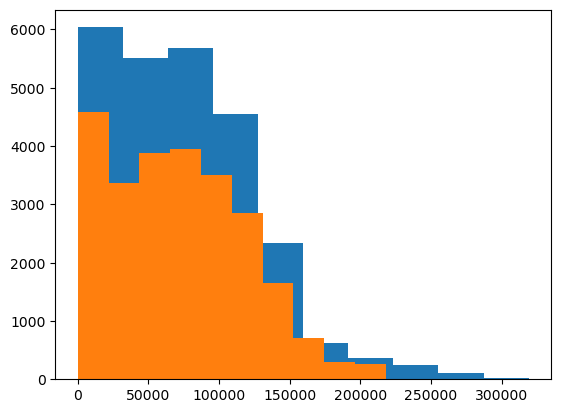

In [11]:
plt.hist(visa_df["prevailing_wage"])
plt.hist(non_outliers_df["prevailing_wage"])
plt.show()

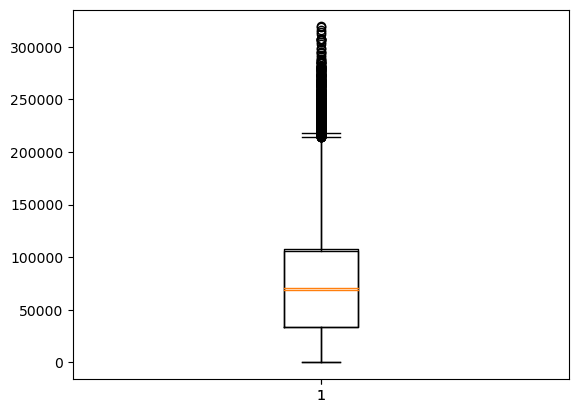

In [12]:
plt.boxplot(visa_df["prevailing_wage"])
plt.boxplot(non_outliers_df["prevailing_wage"],vert=True)
plt.show()

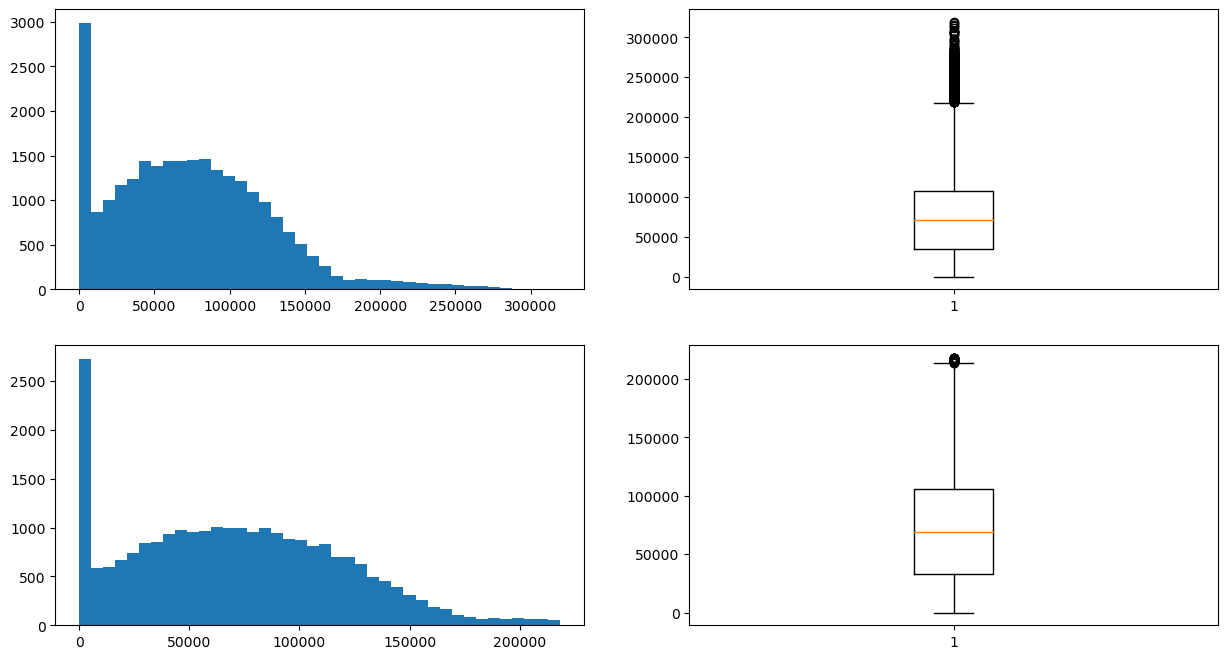

In [13]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.hist(visa_df["prevailing_wage"],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df["prevailing_wage"])
plt.subplot(2,2,3)
plt.hist(non_outliers_df["prevailing_wage"],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outliers_df["prevailing_wage"])
plt.show()

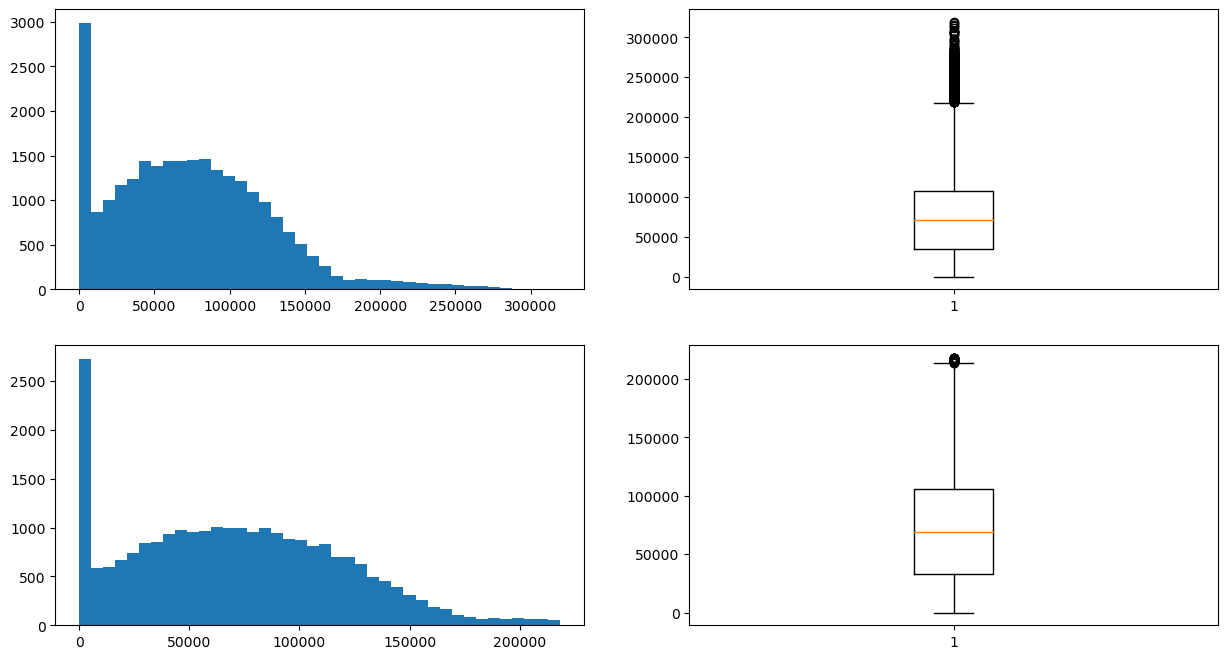

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1).hist(visa_df["prevailing_wage"],bins=40)
plt.subplot(2,2,2).boxplot(visa_df["prevailing_wage"])
plt.subplot(2,2,3).hist(non_outliers_df["prevailing_wage"],bins=40)
plt.subplot(2,2,4).boxplot(non_outliers_df["prevailing_wage"])
plt.show()

***How to deal the outliers***
- Drop the outliers
   - we can  drop the outliers if outliers percentage<2%
   - but this is not recommended , we lost other columns data also
- inpute with median values
    - As we know that median is not affected by the outliers 
    - So if it is good to practice we can impute  outliers 
- Cap with Q3 or Q1 value
    - If outliers are presnt less than lower bound then fill with Q1
    - If outliers are more than upper bound then fill with Q3

In [16]:
c1=visa_df["prevailing_wage"]<lb
c2=visa_df["prevailing_wage"]>ub
c=c1|c2
outliers_df=visa_df[c]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [23]:
d1=visa_df["prevailing_wage"]
lb=Q1-1.5*73720.042
ub=Q3+1.5*73720.042
list1=[]
median=d1.median()
for i in d1:
    if (i<lb) & (i>ub):
        list1.append(i)
    else:
        list1.append(i)
print(len(list1))

25480


In [18]:
median=d1.median()
median

70308.20999999999

In [19]:
d1=visa_df["prevailing_wage"]
d1

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [24]:
t1=visa_df.keys()
t1

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

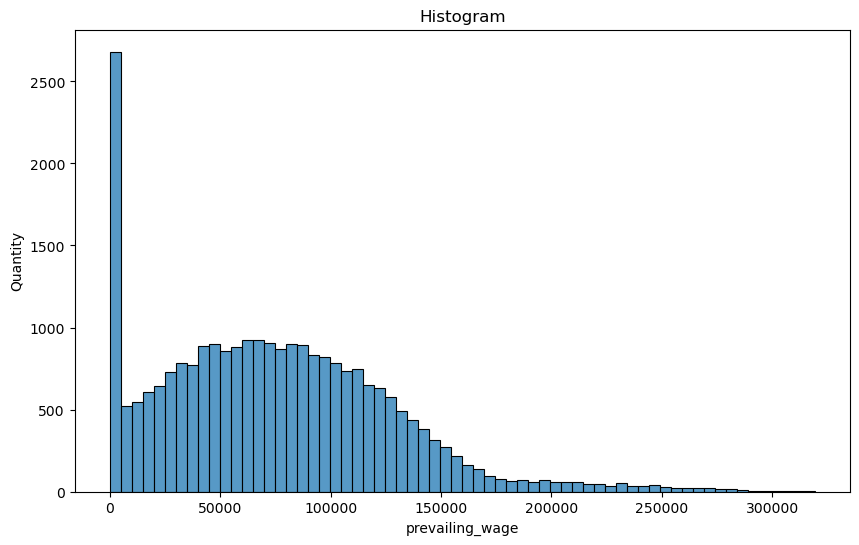

In [32]:
# task-2:
# In seaborn how to plot histogram
plt.figure(figsize=(10,6))
sns.histplot(visa_df["prevailing_wage"])
plt.xlabel("prevailing_wage")
plt.ylabel("Quantity")
plt.title("Histogram")
plt.show()

# Task-1
- Craeate a dataframe
- lower upper frquency
- 2.136 7.98 2992